<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/ml_zero_to_hero/nlp_zero_to_hero_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 写経元

[Training a model to recognize sentiment in text (NLP Zero to Hero - Part 3)](https://www.youtube.com/watch?v=Y_hzMnRXjhI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=4&t=0s)

* [Colab](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb)
* [GitHub](https://rishabhmisra.github.io/publications/)


In [0]:
%tensorflow_version 2.x

import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
!wget --no-check-certificate  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O /tmp/sarcasm.json

--2020-06-02 22:18:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-06-02 22:18:24 (106 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
traingin_padded = pad_sequences(
    training_sentences, maxlen=max_length,
    padding=padding_type, truncating=trunc_type)

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(
    testing_sentences, maxlen=max_length,
    padding=padding_type, truncating=trunc_type)


In [0]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(traingin_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 30
history = model.fit(
    training_padded, training_labels, epochs=num_epochs,
    validation_data=(testing_padded, testing_labels),
    verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6753 - accuracy: 0.5777 - val_loss: 0.6121 - val_accuracy: 0.6600
Epoch 2/30
625/625 - 2s - loss: 0.4410 - accuracy: 0.8242 - val_loss: 0.3832 - val_accuracy: 0.8401
Epoch 3/30
625/625 - 2s - loss: 0.3133 - accuracy: 0.8740 - val_loss: 0.3514 - val_accuracy: 0.8527
Epoch 4/30
625/625 - 2s - loss: 0.2629 - accuracy: 0.8964 - val_loss: 0.3494 - val_accuracy: 0.8498
Epoch 5/30
625/625 - 2s - loss: 0.2264 - accuracy: 0.9119 - val_loss: 0.3420 - val_accuracy: 0.8581
Epoch 6/30
625/625 - 2s - loss: 0.1984 - accuracy: 0.9245 - val_loss: 0.3478 - val_accuracy: 0.8544
Epoch 7/30
625/625 - 2s - loss: 0.1770 - accuracy: 0.9326 - val_loss: 0.3682 - val_accuracy: 0.8532
Epoch 8/30
625/625 - 2s - loss: 0.1588 - accuracy: 0.9405 - val_loss: 0.4068 - val_accuracy: 0.8369
Epoch 9/30
625/625 - 2s - loss: 0.1429 - accuracy: 0.9488 - val_loss: 0.3903 - val_accuracy: 0.8533
Epoch 10/30
625/625 - 2s - loss: 0.1291 - accuracy: 0.9539 - val_loss: 0.4183 - val_accuracy: 0.8442

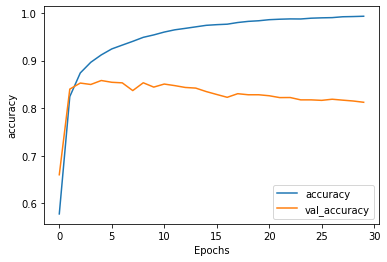

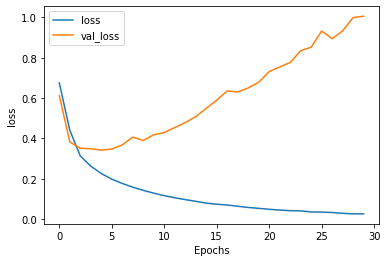

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
reverse_word_index = dict([(value, key) for  (key, value) in word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])


former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
[153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864]
1


In [14]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)  # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word+ "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [17]:
sentence = [
    "granny starting to fear spiders in the garden might be real",
    "game of thrones season finale showing this sunday night"
]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.5947212e-01]
 [2.8872065e-04]]
